In [2]:
def show_im(img):  # for showing data as image
    list_image = [item for sublist in img for item in sublist]
    new_image = Image.new("RGBA", (len(img[0]), len(img)))
    new_image.putdata(list_image)
    return new_image

def drawCycleDiagram(pixels, width, height):
    Ro = 1000.0
    Ri = 380.0
    # img = [[1 for x in range(int(width))] for y in range(int(height))]
    cir = [[0 for x in range(int(Ro * 2))] for y in range(int(Ro * 2))]

    for i in range(int(Ro)):
        # outer_radius = Ro*m.cos(m.asin(i/Ro))
        outer_radius = m.sqrt(Ro*Ro - i*i)
        for j in range(-int(outer_radius),int(outer_radius)):
            if i < Ri:
                # inner_radius = Ri*m.cos(m.asin(i/Ri))
                inner_radius = m.sqrt(Ri*Ri - i*i)
            else:
                inner_radius = -1
            if j < -inner_radius or j > inner_radius:
                # this is the destination
                # solid:
                # cir[int(Ro-i)][int(Ro+j)] = (255,255,255)
                # cir[int(Ro+i)][int(Ro+j)] = (255,255,255)
                # textured:

                x = Ro+j
                y = Ro-i
                # calculate source
                angle = m.atan2(y-Ro,x-Ro)/2
                distance = m.sqrt((y-Ro)*(y-Ro) + (x-Ro)*(x-Ro))
                distance = m.floor((distance-Ri+1)*(height-1)/(Ro-Ri))
                cir[int(y)][int(x)] = pixels[int(width*angle/m.pi) % width, height-distance-1]
                y = Ro+i
                # calculate source
                angle = m.atan2(y-Ro,x-Ro)/2
                distance = m.sqrt((y-Ro)*(y-Ro) + (x-Ro)*(x-Ro))
                distance = m.floor((distance-Ri+1)*(height-1)/(Ro-Ri))
                cir[int(y)][int(x)] = pixels[int(width*angle/m.pi) % width, height-distance-1]

    return cir

In [28]:
syms = {
    #"0c39": "MainPaintLoop",
    "08e0": "PaintStructureAtCurrentPosition-Enter",
    "08eb": "PaintStructureAtCurrentPosition-Exit",
    "0932": "PaintStructureAtCurrentPosition-Exit",
    "098b": "PaintPixelForCurrentSymmetry-Enter",
    "099f": "PaintPixelForCurrentSymmetry-Exit",
    "09c9": "PaintPixelForCurrentSymmetry-Exit",
    "08a0": "PaintPixel-Enter",
    "08d7": "PaintPixel-Exit",
    "08df": "PaintPixel-Exit",
    "0b80": "MainInterruptHandler-Enter",
    "0b85": "MainInterruptHandler-Exit",
    "0c4b": "MainInterruptHandler-Exit",
    "0b29": "MainPaintLoop-Enter",
    "0b5d": "MainPaintLoop-Exit",
}
import os
log_file = "PsychedeliaExecutionTrace.txt"
traces = '\n'.join(["tr exec "+k for k in syms])
open('executiontrace.txt','w').write(f"""log on
logname "{log_file}"
{traces}
""")


229

In [30]:
os.chdir('../psychedelia-listing')
! make psychedelia.prg
os.chdir('../notebooks')
! rm PsychedeliaExecutionTrace.txt
#! ~/Dev/vice-emu-code/vice/src/x64sc -directory ~/Dev/vice-emu-code/vice/data/ -moncommands trackingtrace.txt ../psychedelia/bin/psychedelia.prg 
! x64  -moncommands executiontrace.txt ../psychedelia-listing/bin/psychedelia.prg 

64tass -Wall --cbm-prg -Wno-implied-reg -o bin/psychedelia.prg -L bin/list-co1.txt -l bin/labels.txt src/psychedelia.asm
64tass Turbo Assembler Macro V1.56.2625
64TASS comes with ABSOLUTELY NO WARRANTY; This is free software, and you
are welcome to redistribute it under certain conditions; See LICENSE!

Assembling file:   src/psychedelia.asm
Error messages:    None
Warning messages:  None
Passes:            3
Memory range:      $0801-$0d85   $0585
echo "e36c7c60f7b8c268f761f7cc6a1521c2  bin/psychedelia.prg" | md5sum -c
bin/psychedelia.prg: OK
Hotkeys: Initializing.
Hotkeys: Parsing C64 hotkeys file:
Hotkeys: OK.
ffmpeg avformat lib has version 3a4c64, VICE expects 3a4c64: full match
ffmpeg  avcodec lib has version 3a8664, VICE expects 3a8664: full match
ffmpeg   avutil lib has version 384664, VICE expects 384664: full match
ffmpeg  swscale lib has version 050964, VICE expects 050964: full match
ffmpeg swresample lib has version 030964, VICE expects 030964: full match
Detecting ISA Hard

In [31]:
input_file = open(log_file,'r')

trace = []
lines = input_file.readlines()
for i in range(len(syms)+1, len(lines), 2):
    addr = lines[i][3:7]
    pc = int(lines[i][70:79].strip())
    trace += [(syms[addr],pc)]

pstart = min([pc for s,pc in trace if "PaintStructureAtCurrentPosition" in s])
pend = max([pc for s,pc in trace if "PaintStructureAtCurrentPosition" in s])
trace = [(s,pc) for s,pc in trace if pc >= pstart and pc <= pend+100]

bpc = trace[0][1]
trace = [(a,pc-bpc) for a,pc in trace]
trace

[('PaintStructureAtCurrentPosition-Enter', 0),
 ('PaintPixelForCurrentSymmetry-Enter', 6),
 ('PaintPixel-Enter', 24),
 ('PaintPixel-Exit', 131),
 ('PaintPixel-Enter', 160),
 ('PaintPixelForCurrentSymmetry-Exit', 204),
 ('PaintPixelForCurrentSymmetry-Enter', 273),
 ('PaintPixel-Enter', 291),
 ('PaintPixel-Enter', 342),
 ('PaintPixelForCurrentSymmetry-Exit', 386),
 ('PaintPixelForCurrentSymmetry-Enter', 445),
 ('PaintPixel-Enter', 463),
 ('PaintPixel-Enter', 514),
 ('PaintPixelForCurrentSymmetry-Exit', 565),
 ('PaintPixelForCurrentSymmetry-Enter', 624),
 ('PaintPixel-Enter', 642),
 ('PaintPixel-Exit', 749),
 ('PaintPixel-Enter', 778),
 ('PaintPixel-Exit', 885),
 ('PaintPixelForCurrentSymmetry-Exit', 914),
 ('PaintPixelForCurrentSymmetry-Enter', 973),
 ('PaintPixel-Enter', 991),
 ('PaintPixel-Exit', 1098),
 ('PaintPixel-Enter', 1127),
 ('PaintPixel-Exit', 1234),
 ('PaintPixelForCurrentSymmetry-Exit', 1263),
 ('PaintPixelForCurrentSymmetry-Enter', 1322),
 ('PaintPixel-Enter', 1340),
 ('Pai

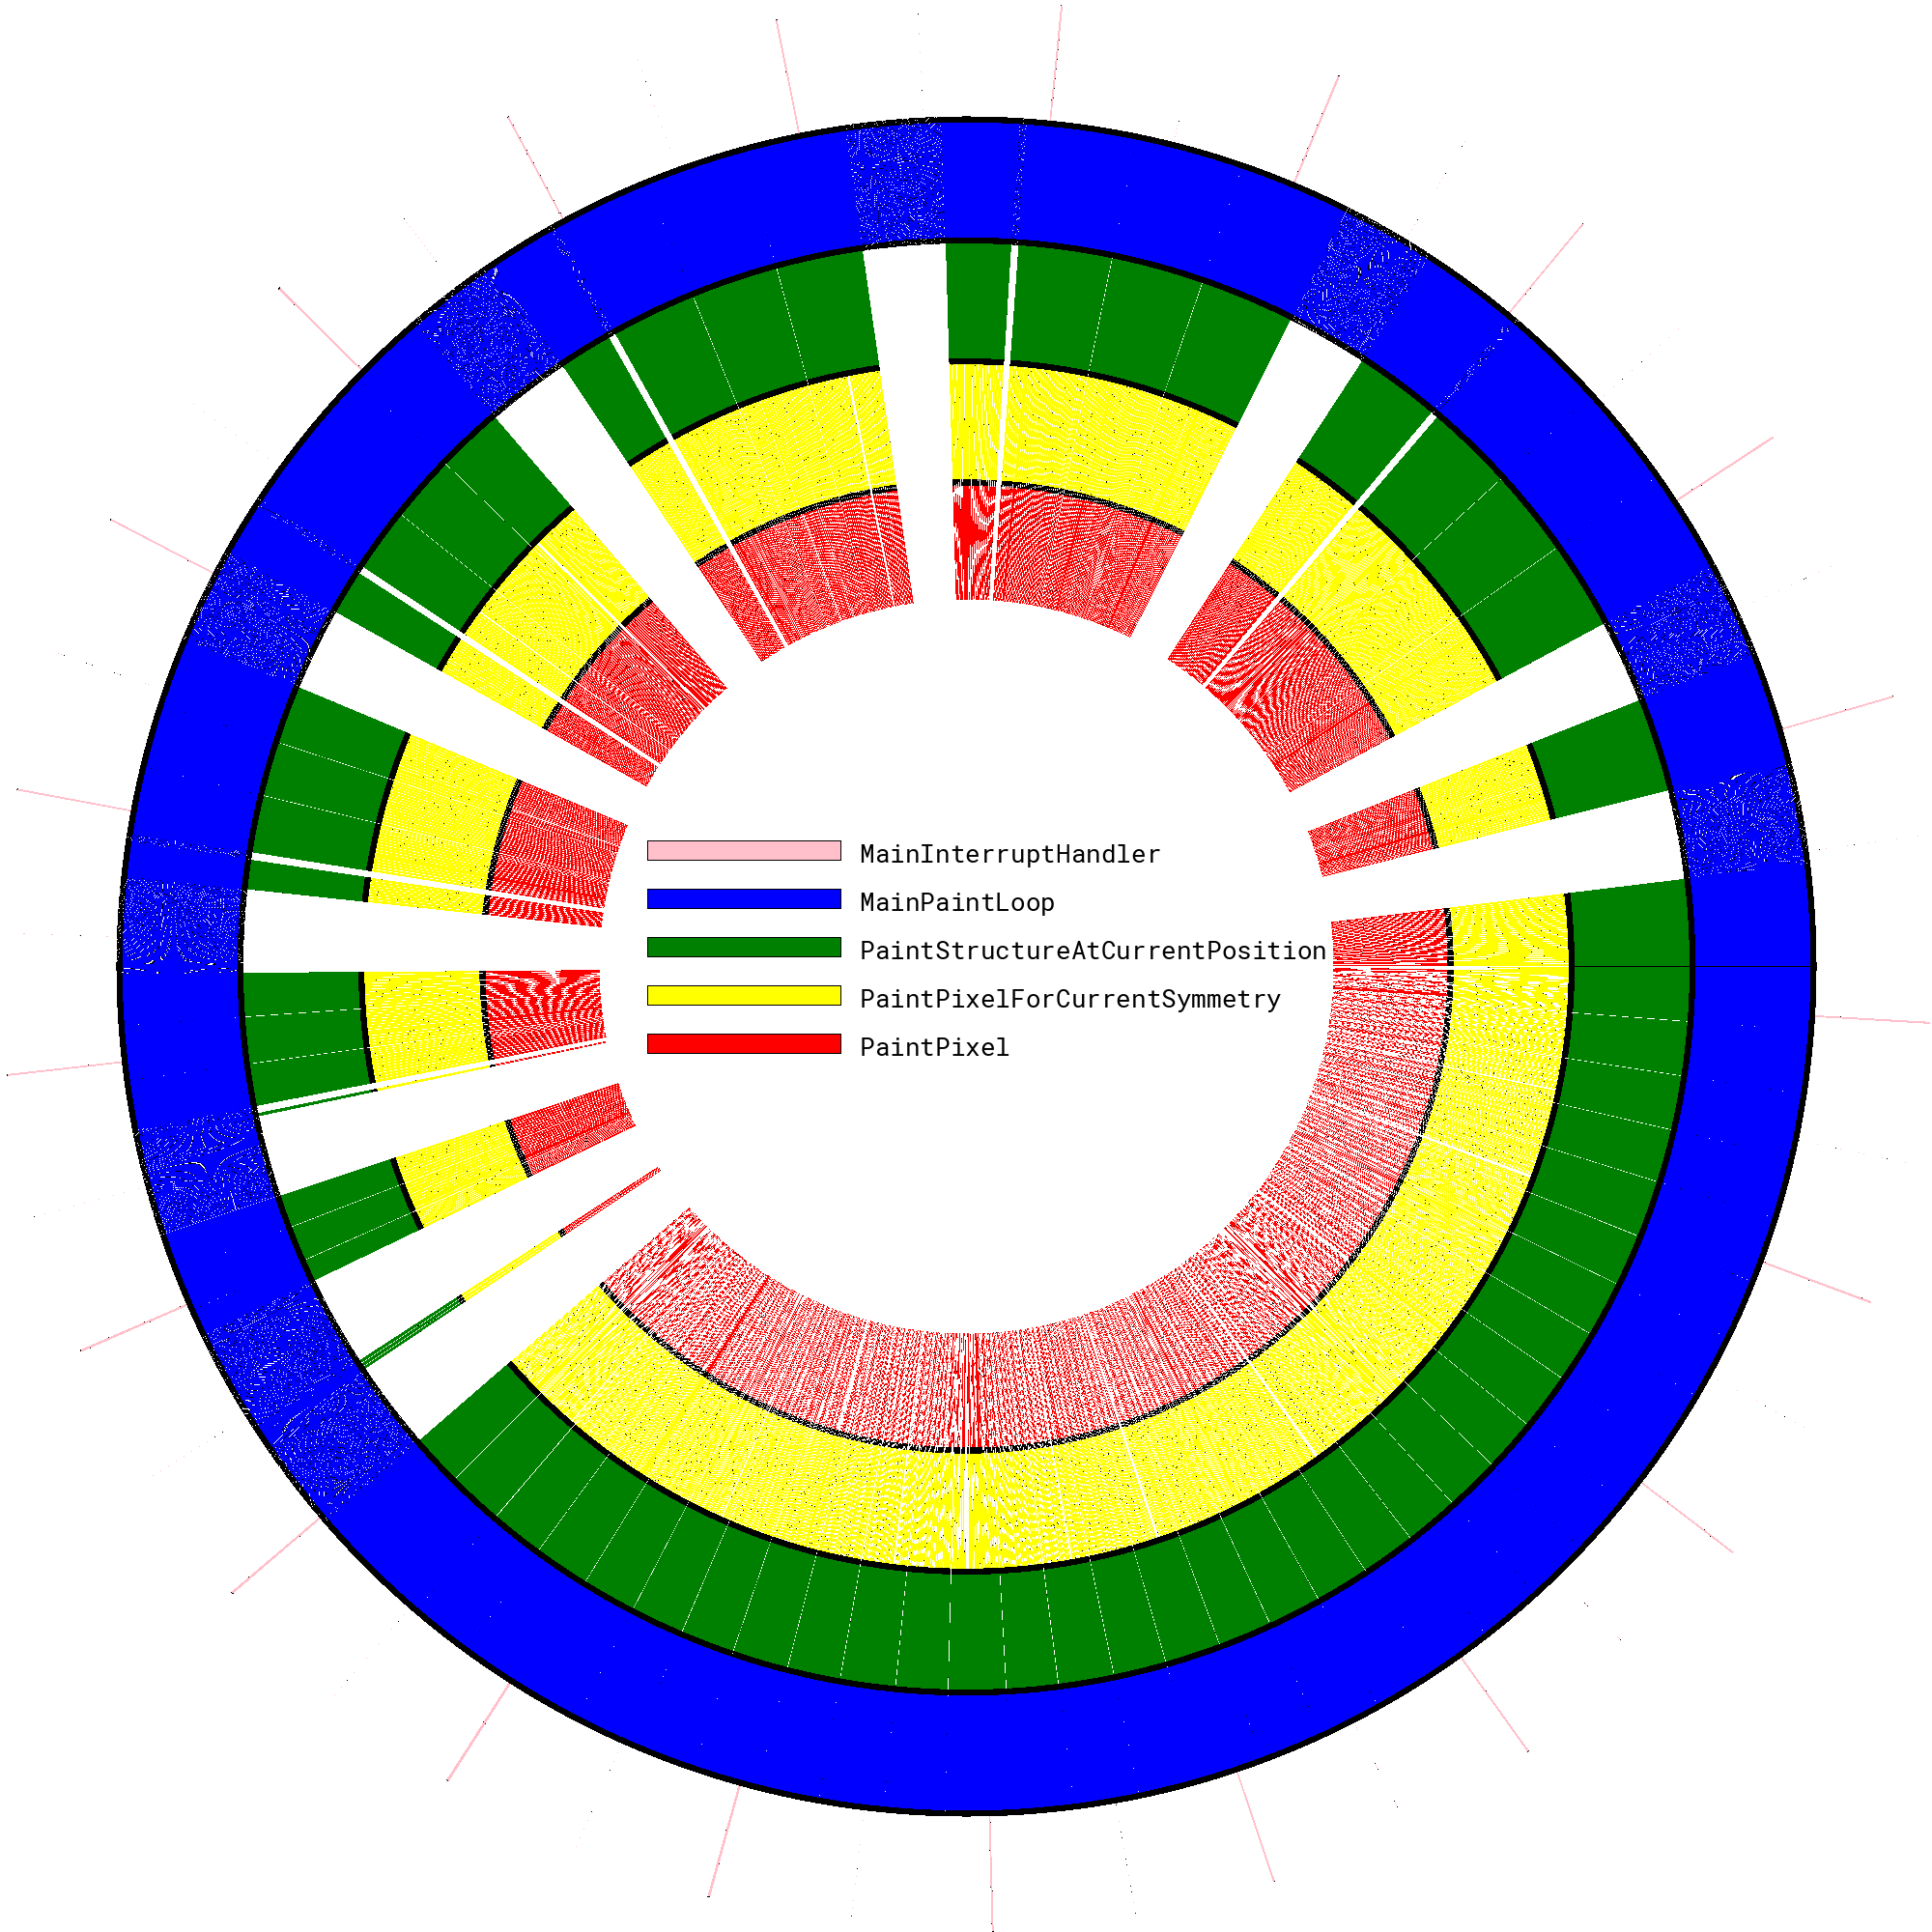

In [27]:
import math as m
from PIL import Image, ImageDraw,ImageFont

levels = [
    ("MainInterruptHandler-", "pink", 0),
    ("MainPaintLoop-", "blue", 20),
    ("PaintStructureAtCurrentPosition-", "green", 40),
    ("PaintPixelForCurrentSymmetry-", "yellow", 60),
    ("PaintPixel-", "red", 80),
]

trunc_trace = trace
width = max([pc for _,pc in trunc_trace])
height = max([y for _,_,y in levels])+20
image = Image.new('RGBA', (width, height))
draw = ImageDraw.Draw(image)

for l,color,y in levels:
    bpc=0
    for s,pc in trunc_trace:
        if l not in s:
            continue
        if "Exit" in s:
            draw.rectangle((bpc, y, pc, y+20), fill=color, outline=(0,0,0))
        bpc = pc

pixels = image.load()
width, height = image.size

font_name = "/home/robert/.local/lib/python3.10/site-packages/jupyterthemes/fonts/monospace/roboto/roboto.ttf"
font = ImageFont.truetype(font_name, 26)

im = drawCycleDiagram(pixels, width, height)
img = show_im(im)
draw = ImageDraw.Draw(img)

x=670
y=870
bw = 200
bh = 20
for l,color,_ in levels:
    draw.rectangle((x,y,x+bw,y+bh), fill=color, outline=(0,0,0))
    draw.text((x+bw+20, y-5),l[:-1],(0,0,0),font=font)
    y+=50
img
